In [4]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from sklearn.manifold import SpectralEmbedding

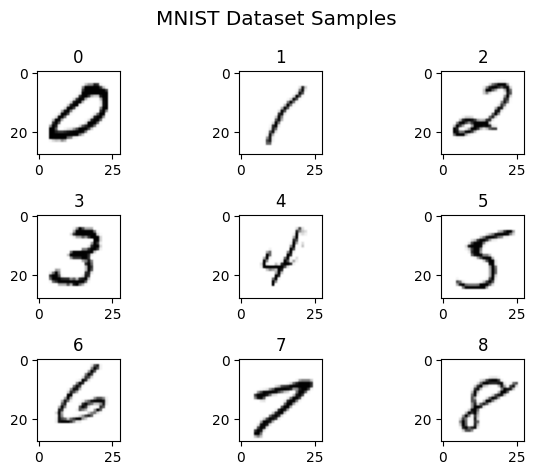

In [5]:
# Load the MNIST data set
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Plot some sample images from data set
plt.figure()
plt.suptitle("MNIST Dataset Samples", fontsize = 'x-large')
label_indexes = { training_labels[i]: i for i in range(len(training_labels)) }

for i in range(9):
    index = label_indexes[i]
    plt.subplot(3, 3, i + 1)
    plt.title(training_labels[index])
    plt.imshow(training_images[index], cmap = 'Greys')

plt.tight_layout()

In [6]:
# Preprocessing data
processed_training_images = training_images / 255.0
processed_test_images = test_images / 255.0

In [7]:
# One-hot vectors

label_set = np.sort(np.unique(training_labels))
training_one_hots = keras.utils.to_categorical(training_labels, len(label_set))
test_one_hots = keras.utils.to_categorical(test_labels, len(label_set))
print("Sample One-Hots:")

for i in range(9):
    print(f"{training_labels[i]}: {training_one_hots[i]}")


Sample One-Hots:
5: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# Logistic Regression
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape", digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


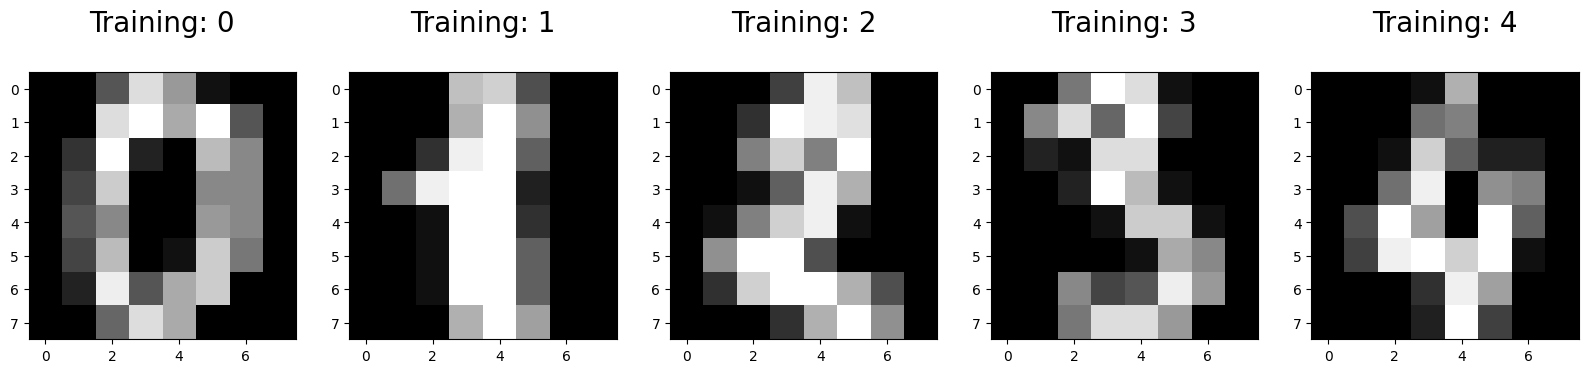

In [11]:
# Showing the Images and the Labels (Digits Dataset)
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)


In [12]:
# Splitting Data into Training and Test Sets (Digits Dataset)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

Step 1. Import the model you want to use

In [13]:
from sklearn.linear_model import LogisticRegression

Step 2. Make an instance of the Model

In [14]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

Step 3. Training the model on the data, storing the information learned from the data

Model is learning the relationship between digits (x_train) and labels (y_train)

In [15]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Step 4. Predict labels for new data (new images)

In [16]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [17]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [18]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

Measuring model performance(Digits Dataset)

In [19]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [20]:
# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [21]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


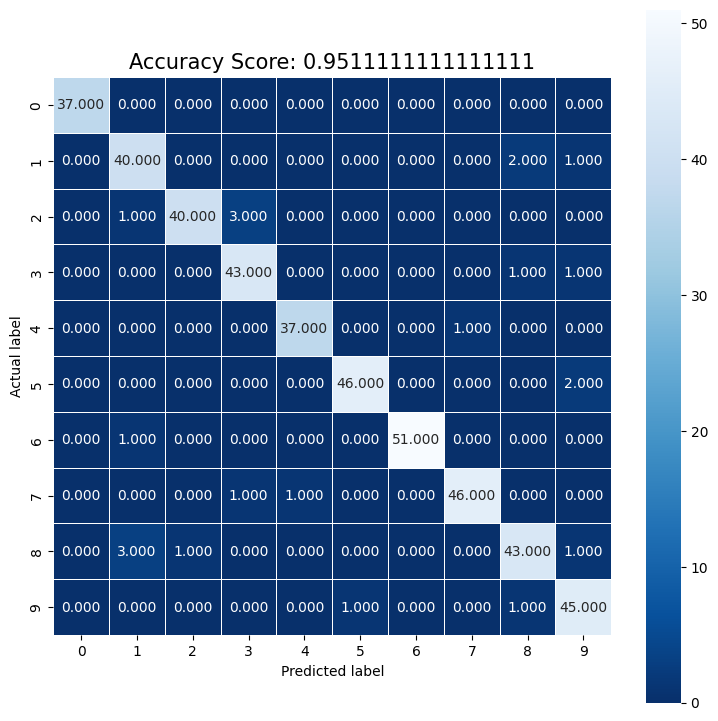

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);